In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [4]:
path = os.getcwd()
with open(path+"\crix_closing_data.json") as f:
    data = json.load(f)
    
df = pd.DataFrame.from_dict(data, orient='columns')

(-15.0, 15.0)

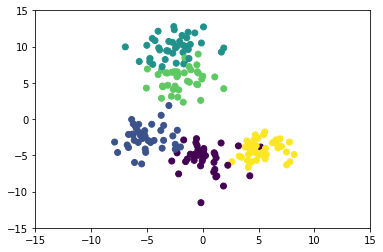

In [29]:
#make blobs to create random clusters
clus_data = make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=1.6, random_state=50)
# create np array for data points
points = clus_data[0]
# create scatter plot
plt.scatter(clus_data[0][:,0], clus_data[0][:,1], c=clus_data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

# K-Means Clustering

In [25]:
kmeans = KMeans(n_clusters=5)
# fit kmeans object to data
kmeans.fit(points)

#location of clusters
print(kmeans.cluster_centers_)

# save new clusters for chart
y_km = kmeans.fit_predict(points)

[[-3.65440663  9.55666371]
 [ 0.46024673 -7.62687173]
 [-5.21332653 -2.05553062]
 [-1.05287316  9.83829725]
 [-0.23483966 -4.48197345]]


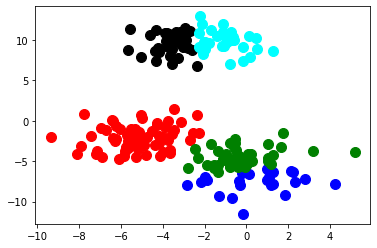

In [26]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')
plt.scatter(points[y_km ==4,0], points[y_km == 4,1], s=100, c='green')

# Hierarchical Clustering

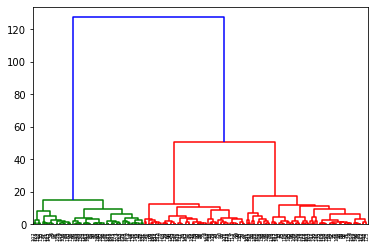

In [27]:
# Rather than choosing a number of clusters and starting out with random centroids, 
# we instead begin with every point in our dataset as a “cluster.”

dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

# it’s easy to see the starting points for the clusters. Only first 3 clusters are color coded. 
# Dendogram runs all the way until every point is its own cluster.

# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
y_hc = hc.fit_predict(points)

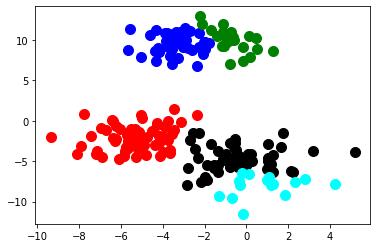

In [28]:
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')
plt.scatter(points[y_hc ==4,0], points[y_hc == 4,1], s=100, c='green')

Both clusters results are quite close. This is not always the case. In general, the agglomerative hierarchical clustering is more accurate. However, it is more difficult to implement and time consuming than K-means. 